In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_excel('raw_data/Gitlab/subhabrataoreo_enodmetriosis-detection-model.xlsx')
print("Shape: ", raw_data.shape)
raw_data.head()

Shape:  (886, 59)


,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,0,1,1
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,1,1,0,1,0,0,1
3,1,0,0,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#check for null values 
raw_data.isnull().sum() #there are no missing values

Heavy / Extreme menstrual bleeding                 0
Menstrual pain (Dysmenorrhea)                      0
Painful / Burning pain during sex (Dyspareunia)    0
Pelvic pain                                        0
Irregular / Missed periods                         0
Cramping                                           0
Abdominal pain / pressure                          0
Back pain                                          0
Painful bowel movements                            0
Nausea                                             0
Menstrual clots                                    0
Infertility                                        0
Painful cramps during period                       0
Pain / Chronic pain                                0
Diarrhea                                           0
Long menstruation                                  0
Constipation / Chronic constipation                0
Vomiting / constant vomiting                       0
Fatigue / Chronic fatigue                     

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Heavy / Extreme menstrual bleeding               886 non-null    int64
 1   Menstrual pain (Dysmenorrhea)                    886 non-null    int64
 2   Painful / Burning pain during sex (Dyspareunia)  886 non-null    int64
 3   Pelvic pain                                      886 non-null    int64
 4   Irregular / Missed periods                       886 non-null    int64
 5   Cramping                                         886 non-null    int64
 6   Abdominal pain / pressure                        886 non-null    int64
 7   Back pain                                        886 non-null    int64
 8   Painful bowel movements                          886 non-null    int64
 9   Nausea                                           886 n

In [5]:
raw_data["Endometriosis_YN"].value_counts() #the yes to no ratio is pretty equal

1    474
0    412
Name: Endometriosis_YN, dtype: int64

In [6]:
# prints the summary of the data
raw_data.describe()

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.432280,0.432280,0.413093,0.490971,0.302483,0.547404,0.408578,0.542889,0.295711,0.381490,...,0.172686,0.257336,0.397291,0.343115,0.376975,0.227991,0.297968,0.250564,0.274266,0.534989
std,0.495673,0.495673,0.492667,0.500201,0.459593,0.498029,0.491849,0.498438,0.456619,0.486027,...,0.378189,0.437413,0.489614,0.475018,0.484902,0.419774,0.457624,0.433583,0.446396,0.499056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#checks the amount of yes/no for each featuer
for i in raw_data:
    print(raw_data[i].value_counts() )

0    503
1    383
Name: Heavy / Extreme menstrual bleeding, dtype: int64
0    503
1    383
Name: Menstrual pain (Dysmenorrhea), dtype: int64
0    520
1    366
Name: Painful / Burning pain during sex (Dyspareunia), dtype: int64
0    451
1    435
Name: Pelvic pain, dtype: int64
0    618
1    268
Name: Irregular / Missed periods, dtype: int64
1    485
0    401
Name: Cramping, dtype: int64
0    524
1    362
Name: Abdominal pain / pressure, dtype: int64
1    481
0    405
Name: Back pain, dtype: int64
0    624
1    262
Name: Painful bowel movements, dtype: int64
0    548
1    338
Name: Nausea, dtype: int64
0    648
1    238
Name: Menstrual clots, dtype: int64
0    708
1    178
Name: Infertility, dtype: int64
0    540
1    346
Name: Painful cramps during period, dtype: int64
0    533
1    353
Name: Pain / Chronic pain, dtype: int64
0    607
1    279
Name: Diarrhea, dtype: int64
0    697
1    189
Name: Long menstruation, dtype: int64
0    684
1    202
Name: Constipation / Chronic constipation,

In [8]:
# No of categorical and numerical variables
raw_data.dtypes.value_counts() #all variables are binary (0 or 1)

int64    59
dtype: int64

Correlation Matrix


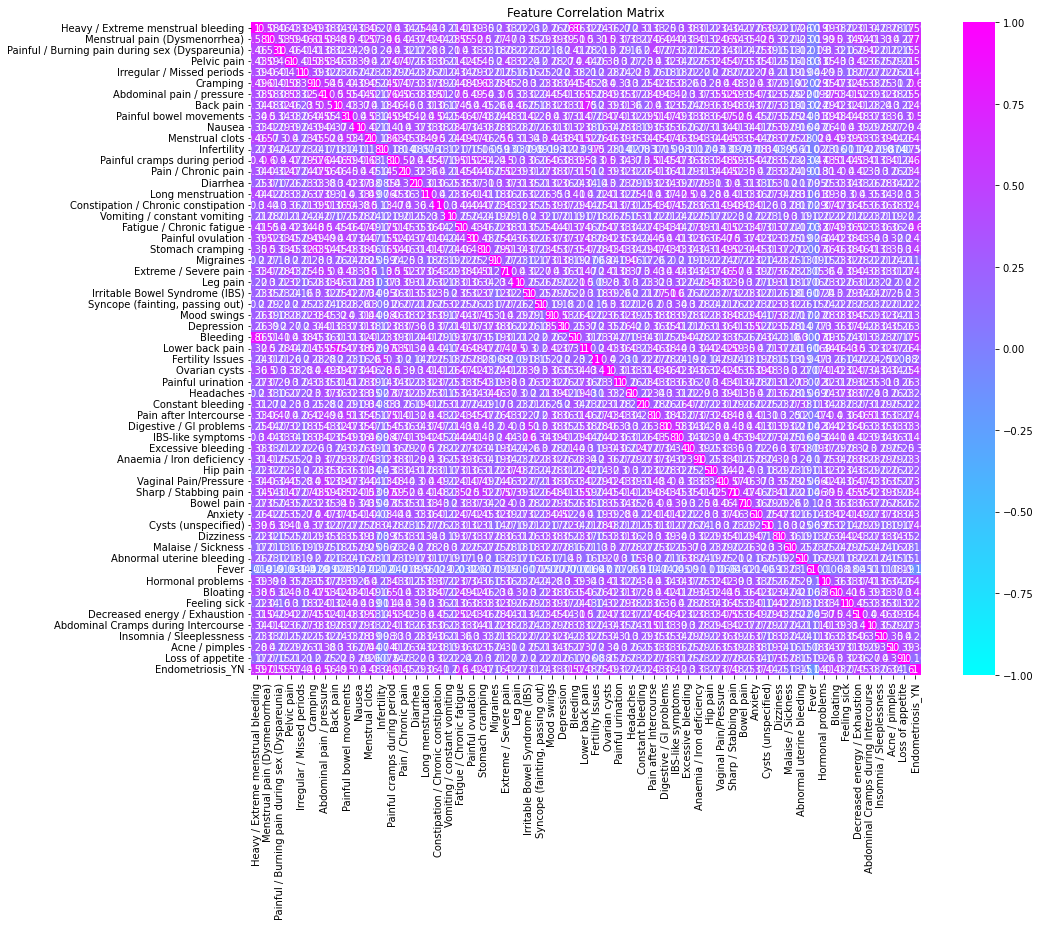

In [19]:
#mine
def correlation_matrix(data):
    print('Correlation Matrix')
    #Correlation Matrix
    corr = data.corr()
    plt.figure(figsize=(15, 12))
    #plot heat map
    g = sns.heatmap(corr, annot=True, cmap="cool", vmin=-1, vmax=1)
    plt.title('Feature Correlation Matrix')
    plt.show()
    
correlation_matrix(raw_data)

In [10]:
#Correlation of variables with Endometriosis
corrMatrix = raw_data.corr()
print(corrMatrix['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

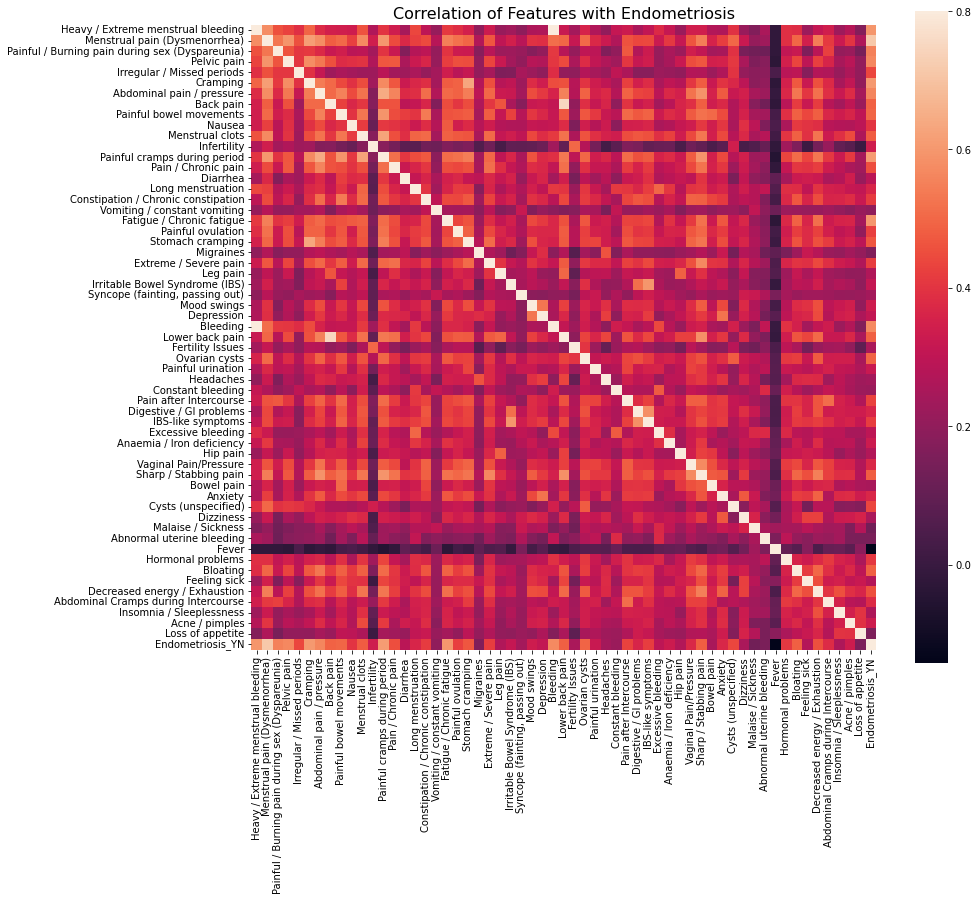

In [11]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Features with Endometriosis',y=1,size=16)
sns.heatmap(corrMatrix,square = True,  vmax=0.8)
plt.show()

In [12]:

# Selecting features with correlation > 0.45 for the analysis
df1 = raw_data[['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period', 'Cramping', 'Fatigue / Chronic fatigue',
       'Heavy / Extreme menstrual bleeding', 'Bleeding', 'Pelvic pain','Abdominal pain / pressure',
          'Painful / Burning pain during sex (Dyspareunia)','Painful bowel movements', 'Ovarian cysts', 'Back pain', 'Bloating',
         'Lower back pain', 'Sharp / Stabbing pain', 'Menstrual clots', 'Stomach cramping', 'Decreased energy / Exhaustion',
         'Pain / Chronic pain', 'Endometriosis_YN']]
# Correlation plot for the selected features
corrMatrix1 = df1.corr()
print(corrMatrix1['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

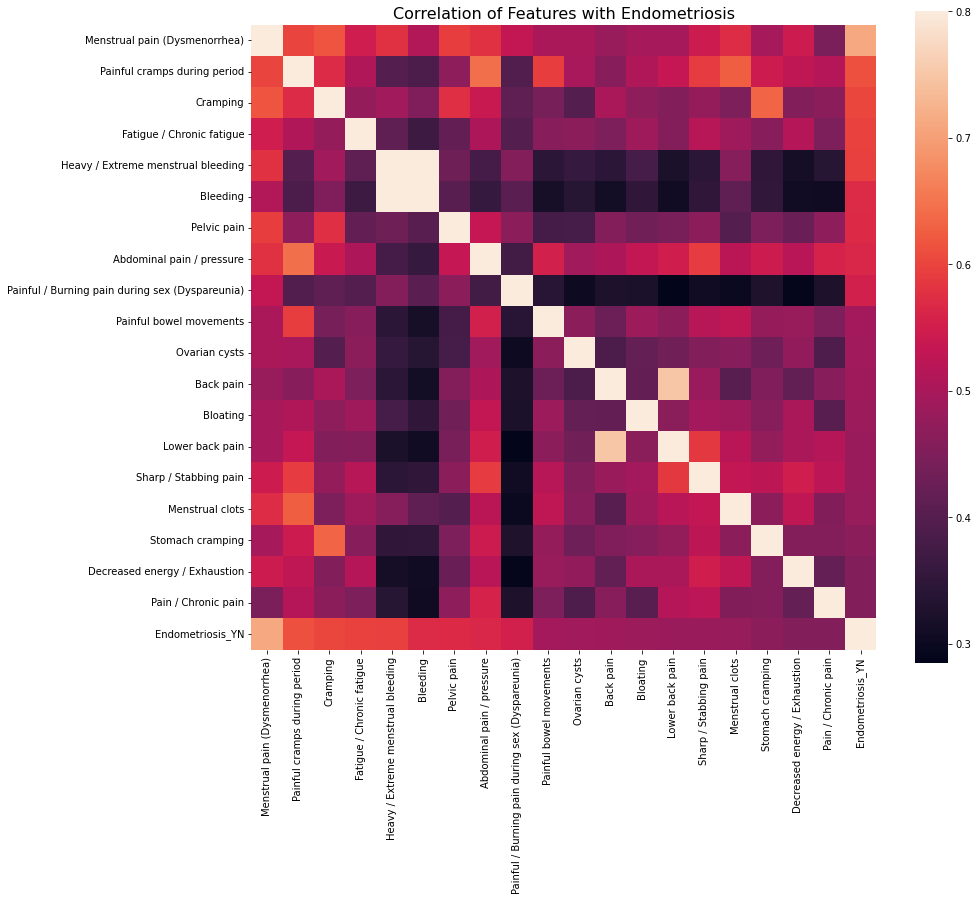

In [13]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Features with Endometriosis',y=1,size=16)

sns.heatmap(corrMatrix1,square = True,  vmax=0.8)
plt.show()

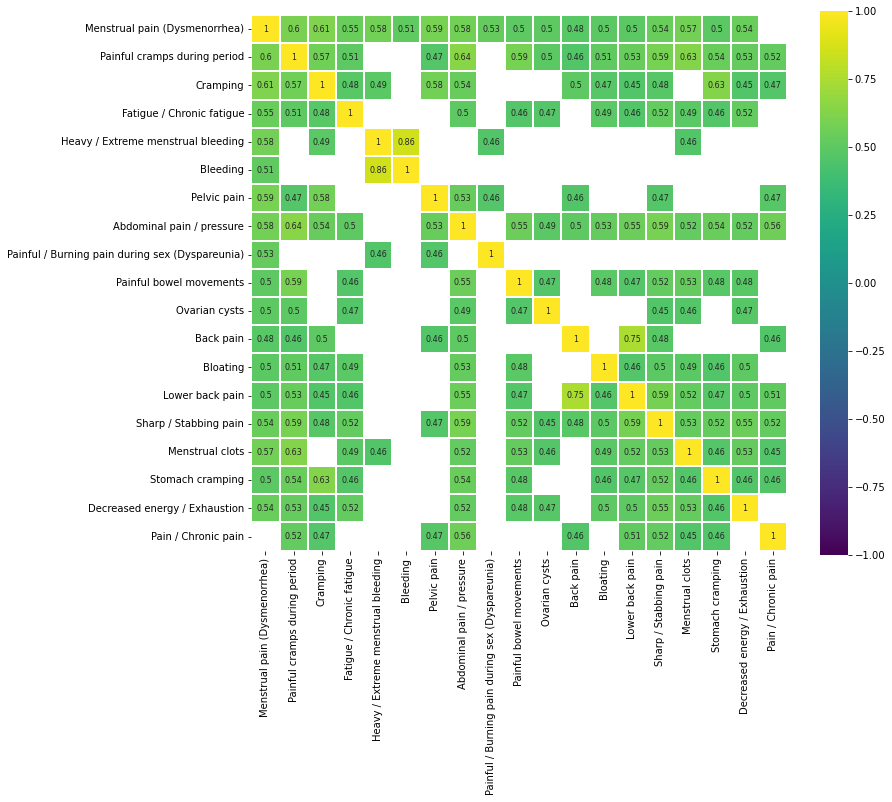

In [14]:
#Correlation plot with corr > 0.45 and < -0.45
corr = df1.drop('Endometriosis_YN', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.45) | (corr <= -0.4)],
                                   cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                                   annot=True, annot_kws={"size": 8}, square=True);

In [15]:
#mine
# def feature_importance(model, x_train, y_train):
    
#     lr_model = LogisticRegression(max_iter = 1000, random_state = 0)
#     lr_model.fit(x_train, y_train)

#     feature_importance = abs(lr_model.coef_[0])
#     feature_importance = (feature_importance / feature_importance.max())
#     sorted_idx = np.argsort(feature_importance)
#     pos = np.arange(sorted_idx.shape[0]) + .5

#     print("Feature Importance")
#     featfig = plt.figure(figsize=(12, 6))
#     featax = featfig.add_subplot(1, 1, 1)
#     featax.barh(pos, feature_importance[sorted_idx], align='center')
#     featax.set_yticks(pos)
#     featax.set_yticklabels(np.array(data.columns)[sorted_idx], fontsize=14)

#     plt.tight_layout()   
#     plt.show()

In [16]:
# create correlation matrix
# create feature importance